<a href="https://colab.research.google.com/github/kalakhushi18/Deep-Learning/blob/main/hw1_khushi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Building and Training MLP and CNN Models with PyTorch

**Total Points**: 100

---

## **Table of Contents**

1. [Introduction](#introduction)
2. [Assignment Instructions](#instructions)
3. [Tasks](#tasks)
   - [1. Import Libraries and Prepare Data (10 points)](#task1)
   - [2. Build an MLP Model (20 points)](#task2)
   - [3. Train the MLP Model (15 points)](#task3)
   - [4. Evaluate the MLP Model (10 points)](#task4)
   - [5. Build a CNN Model (20 points)](#task5)
   - [6. Train the CNN Model (15 points)](#task6)
   - [7. Evaluate the CNN Model (10 points)](#task7)
4. [Submission Guidelines](#submission)
5. [Grading Criteria](#grading)

---

<a name="introduction"></a>
## 1. Introduction

In this assignment, you will:

- Build and train a **Multilayer Perceptron (MLP)**.
- Build and train a **Convolutional Neural Network (CNN)**.
- Use the **MNIST dataset** for training and evaluation.
- Compare the performance of both models.

---

<a name="instructions"></a>
## 2. Assignment Instructions

- Complete each task in the sections below.
- **Code cells**: Fill in the missing code where indicated.
- **Markdown cells**: Provide answers to the questions where prompted.
- **Point values** are indicated for each task.

---



<a name="tasks"></a>
## 3. Tasks


<a name="task1"></a>
### Task 1: Import Libraries and Prepare Data (10 points)

#### a. Import the necessary libraries. (2 points)

In [ ]:
# Import PyTorch and other required libraries
%matplotlib inline
import torch
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# setting seed and setting device to GPU
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)
device = torch.device("cpu") if not torch.cuda.is_available() else torch.device("cuda:0")
print("Using device", device)


Using device cuda:0


b. Prepare the data loaders for the MNIST dataset. (8 points)
- Apply transformations to normalize the data.
- Create training and test datasets and loaders.

In [ ]:
# Define transformations for the training and testing data
transform = transforms.Compose([
    # TODO: Add the necessary transformations
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to mean 0.5, std 0.5

])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoaders for managing batches
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)


In [ ]:
# checking the sizes
print("Number of Images in training dataset: ", len(train_dataset))
print("Number of Images in test dataset: ", len(test_dataset))

Number of Images in training dataset:  60000
Number of Images in test dataset:  10000


In [ ]:
#checking the shape of images
print("The shape of images in MNIST dataset is: ", train_dataset[0][0].size())

# This returns number of channels(1 for grayscale), height (28), width(28)

The shape of images in MNIST dataset is:  torch.Size([1, 28, 28])


<a name="task2"></a>

### Task 2: Build an MLP Model (20 points)

#### a. Define an MLP class with the specified architecture. (15 points)


The MLP should have:
- An input layer that flattens the 28x28 images.
- Two hidden layers with 512 and 256 neurons, respectively.
- An output layer with 10 neurons (one for each class).

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()

        # TODO: Define the layers as specified
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        # TODO: Implement the forward pass
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### b. Explain why we flatten the input images in the MLP model. (5 points)



**Answer:**

In a Multilayer Perceptron (MLP), which is a type of fully connected neural network, all input features must be transformed into a single vector before being processed by the network.This means converting the multi-dimensional image tensor into a 1D vector through a process called flattening.

Flattening the images means converting them from 3 dimensions array of channels, width and height into 1 dimensional array so that the first layer of neural network which receives the input in a single array format does not face any issue while processing the images.

Grayscale image of 28x28 pixels:

Original image shape: (28, 28)

Flattened image shape: (784,)

The flattening process essentially "unrolls" the 2D image into a single long vector by concatenating each row of pixels one after another. This transformation allows the MLP to process the entire image as a set of individual input features.

<a name="task3"></a>

### Task 3: Train the MLP Model (15 points)
####a. Write the training loop for the MLP model. (10 points)
- Use the Adam optimizer and CrossEntropyLoss.
- Train for 5 epochs.

In [ ]:
# Instantiate the model, define the loss function and the optimizer
mlp_model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
training_loss_history = []

for epoch in range(num_epochs):
    print('training epoch', epoch+1, "of", num_epochs)

    mlp_model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):  # 64 batch size=> 938 imgs per batch

        data, target = data.to(device), target.to(device)

        output = mlp_model(data)

        loss = criterion(output, target)   #loss calculate

        optimizer.zero_grad()     #gradients zero
        loss.backward()
        optimizer.step()          # optimizing step

        total_loss += loss.item()

        # Average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    training_loss_history.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")



training epoch 1 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/5], Loss: 0.3068
training epoch 2 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/5], Loss: 0.1414
training epoch 3 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/5], Loss: 0.1010
training epoch 4 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/5], Loss: 0.0836
training epoch 5 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/5], Loss: 0.0716


#### b. Plot the training loss over epochs. (5 points)

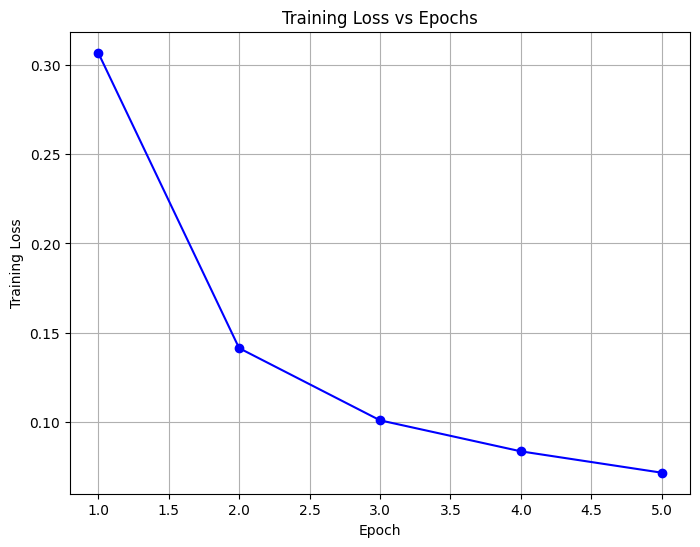

In [ ]:
# TODO: Record the loss values and plot them
import matplotlib.pyplot as plt

# Your code here to plot the training loss

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), training_loss_history, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.grid()
plt.show()


<a name="task4"></a>

### Task 4: Evaluate the MLP Model (10 points)
#### a. Evaluate the trained MLP model on the test dataset. (5 points)

In [ ]:
# TODO: Implement the evaluation code
mlp_model.eval()

correct = 0
total = len(test_dataset)

with torch.no_grad():
    for data, target in tqdm(test_loader):  # test batch size = 10000
        data, target = data.to(device), target.to(device)
        # Forward pass
        x = data.view(-1, 28*28)
        y = mlp_model(x)

        predictions = torch.argmax(y, dim=1)  # max prediction
        correct += torch.sum((predictions == target).float())

print('Test accuracy: {}'.format(correct/total))


  0%|          | 0/10 [00:00<?, ?it/s]

Test accuracy: 0.9736999869346619


#### b. Report the test accuracy. (5 points)

**Answer:** The accuracy of the MLP on the test images is **0.97 or 97.36%**.


<a name="task5"></a>

### Task 5: Build a CNN Model (20 points)
#### a. Define a CNN class with the specified architecture. (15 points)
The CNN should have:
- Two convolutional layers:
-- First layer: 1 input channel, 32 output channels, kernel size 3, padding 1.
-- Second layer: 32 input channels, 64 output channels, kernel size 3, padding 1.
- A max pooling layer after each convolutional layer.
- Two fully connected layers:
-- First layer: inputs matching the flattened output from conv layers, 128 neurons.
-- Second layer: 128 neurons, 10 output neurons.

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # TODO: Define the convolutional and fully connected layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(7*7*64, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)

        #flattening
        x = x.view(-1, 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)

        return x


#### b. Explain the role of convolutional layers in CNNs. (5 points)

**Answer:**

Convolutional layer are responsible for creating a feature map for the given image in that layer.

Convolutional layers learn spatial hierarchies of features.

Early layers extract low-level features such as edges, textures, or colors.

Deeper layers extract higher-level features like shapes, patterns, and object structures.

Instead of learning weights for each pixel, convolutional layers learn small, localized filters (kernels).These filters slide (or convolve) across the input to detect patterns.

By using smaller filters, convolutional layers reduce the number of parameters compared to fully connected layers, making them computationally efficient.

Since the same filter is applied across the entire image, convolutional layers help detect features regardless of their position in the image.( translation invariance)


<a name="task6"></a>

### Task 6: Train the CNN Model (15 points)
### a. Write the training loop for the CNN model. (10 points)
- Use the Adam optimizer and CrossEntropyLoss.
- Train for 5 epochs.

In [ ]:
# Instantiate the model, define the loss function and the optimizer
cnn_model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
training_loss_history_cnn = []

for epoch in range(num_epochs):
    print('training epoch', epoch+1, "of", num_epochs)

    cnn_model.train()
    total_loss = 0

    for batch_idx, (data, target) in enumerate(tqdm(train_loader)):

        data, target = data.to(device), target.to(device)
        # Forward pass
        x = data
        y = cnn_model(x)

        loss = criterion(y, target)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

              # Average loss for the epoch
    avg_loss = total_loss / len(train_loader)
    training_loss_history_cnn.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")


training epoch 1 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [1/5], Loss: 0.1608
training epoch 2 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [2/5], Loss: 0.0452
training epoch 3 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [3/5], Loss: 0.0314
training epoch 4 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [4/5], Loss: 0.0235
training epoch 5 of 5


  0%|          | 0/938 [00:00<?, ?it/s]

Epoch [5/5], Loss: 0.0176


#### b. Plot the training loss over epochs. (5 points)

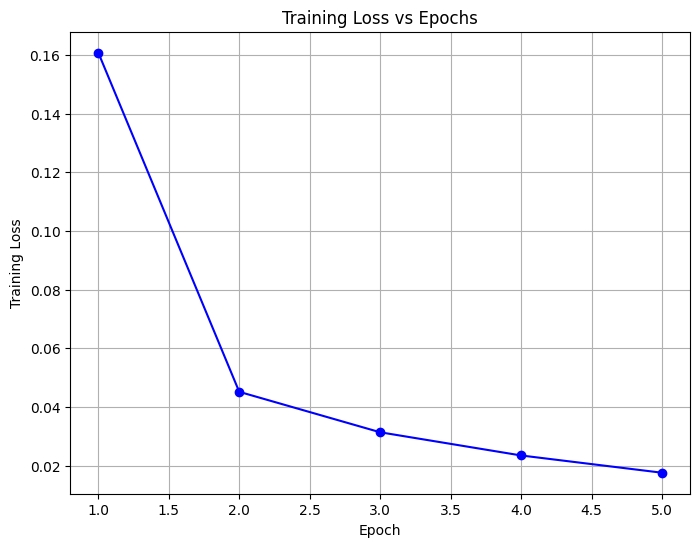

In [ ]:
# TODO: Record the loss values and plot them
import matplotlib.pyplot as plt

# Your code here to plot the training loss

plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), training_loss_history_cnn, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epochs')
plt.grid()
plt.show()



<a name="task7"></a>

### Task 7: Evaluate the CNN Model (10 points)
#### a. Evaluate the trained CNN model on the test dataset. (5 points)

In [ ]:
# TODO: Implement the evaluation code
cnn_model.eval()

correct = 0
total = len(test_dataset)

with torch.no_grad():
    for data, target in tqdm(test_loader):  # test batch size = 10000
        data, target = data.to(device), target.to(device)

        # Forward pass
        x = data
        y = cnn_model(x)

        predictions = torch.argmax(y, dim=1)  # max prediction
        correct += torch.sum((predictions == target).float())

print('Test accuracy: {}'.format(correct/total))



  0%|          | 0/10 [00:00<?, ?it/s]

Test accuracy: 0.9910999536514282


#### b. Report the test accuracy. (5 points)

**Answer:** The accuracy of the CNN on the test images is **0.99 or 99.10%**.


<a name="submission"></a>

### 4. Submission Guidelines
Submit your completed notebook in .ipynb format on private channel on Mattermost.
- Ensure all code cells are executed and outputs are visible.
- Provide answers to all questions in the markdown cells.
- Include any plots or visualizations you generated.

Submitted By: Khushi Kala